# Customer Behavior Segmentation Analysis

## Introduction

This dataset contains information about customers and their purchases for an apparel store. It includes demographics, purchase history, product preferences, and more. 

<br>

The **main goal** of this analysis is to:
* Determine customer segments from purchase behavior

* Identify opportunities for targeted marketing strategies that drive revenue and growth

<br>

**Business Questions**:

* What are the customer segments based on purchase behavior?

* What customers are currently driving the most revenue?

* Which customers purchase the most frequently?

* Which customers uses promotions or discounts the most?

* Are there customers we could likely convert to subsciption?

* What products and categories are most popular? 

* When is the best season to promote the business?

<br>

**Assumptions**: 
* The store mainly sells modern, professional, and casual clothing. They are a popular destination for workwear, known for their minimalist styles and high-quality fabrics.

* They do seasonal releases for certain apparel, and offer promo codes or discounts throughout the year.

* Subscription Status refers to registration of using an account to purchase from the store. Customers who are subscribed can also opt-in to receive email communications and receive rewards or benefits. 




---
## Data Preparation and Cleaning

**Preparing the environment**

In [ ]:
# Import libraries and alias for easy reading
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [146]:
# Read & load the datatset into a dataframe
customers = pd.read_csv('customer_purchase.csv')

**Viewing the data & understanding its shape and contents**

In [3]:
# Preview first 5 rows of data set
customers.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


There is a mix of categorical, numerical, and geographical variables.

Each row represents a unique customer with details about them such as age, gender, as well as the purchase they made. There is also information on the customer's behavior such as previous purhcases and their frequency of purchases.

In [4]:
#Looking at the structure of the data & summarized information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

There are 3,900 rows including the header and 18 columns. Data types are correct and match the corresponding values.

**Checking for duplicates**

In [5]:
dups = customers.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Checking for missing values**

In [6]:
missing = customers.isnull()
print('Number of missing values = %d' % (missing.sum().sum()))

Number of missing values = 0


**Standardization**

In [147]:
# Adding Underscores to column names
customers.rename(columns={'Purchase Amount (USD)': 'Purchase_Amount'}, inplace=True)
customers.columns = customers.columns.str.replace(' ', '_')

# Values of Frequency of Purchases column are interchangeable 
customers['Frequency_of_Purchases'] = customers['Frequency_of_Purchases'].replace({
    'Bi-Weekly': 'Fortnightly',
    'Every 3 Months': 'Quarterly'
})

# We don't need size, color columns for analysis.

After checking the dataset, it was mainly clean and ready for analysis.

---
## Summary Statistics

In [5]:
# Get descriptive statistics summary
customers.describe(include = "all")

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,5
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Quarterly
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,1147
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [10]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase_Amount,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


Based on the summary statistics: 

* The average age of customers purchasing from this shop is 44 years old. Most of the customers are also male. 

* The most popular category purchased is clothing. The most popular item purchased is a blouse.

* The most purchases happen in Spring.

* Most customers are not subscribed and don't use discounts and/or promos.

Further analysis of who the customers are and their purchase behavior to be done in the exploratory data analysis. 

---
## Exploratory Data Analysis

Further analysis was done to gain more context and information about the data before performing predictive analysis.

In [ ]:
# Purchase Amounts by Gender and Age Groups
bins = [18, 25, 35, 45, 55, 65, 80]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–80']

customers['Age_Group'] = pd.cut(customers['Age'], bins=bins, labels=labels, right=False)
gender_age_purhcase = customers.groupby(['Gender', 'Age_Group'])['Purchase_Amount'].sum().reset_index()

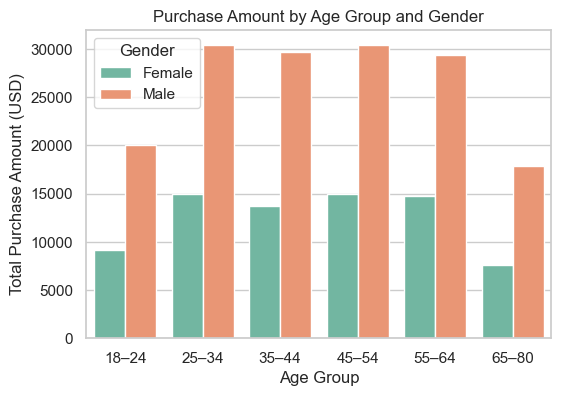

In [ ]:
# Visualizing revenue by age group and gender
sns.set_theme(style = "whitegrid")

plt.figure(figsize = (6, 4))
sns.barplot(data = gender_age_purhcase, 
            x = 'Age_Group', 
            y = 'Purchase_Amount', 
            hue = 'Gender',
            palette = 'Set2')

plt.title('Purchase Amount by Age Group and Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Age Group')
plt.legend(title='Gender')

* Overall, men seem to be the highest spenders, bringing the most revenue to the store. 

* Among them, the age range from 25 - 34 seem to spend the most, closely followed by age ranges 45 - 54, 35 - 44, and 55 - 64. 

([0, 1, 2, 3],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Footwear'),
  Text(3, 0, 'Outerwear')])

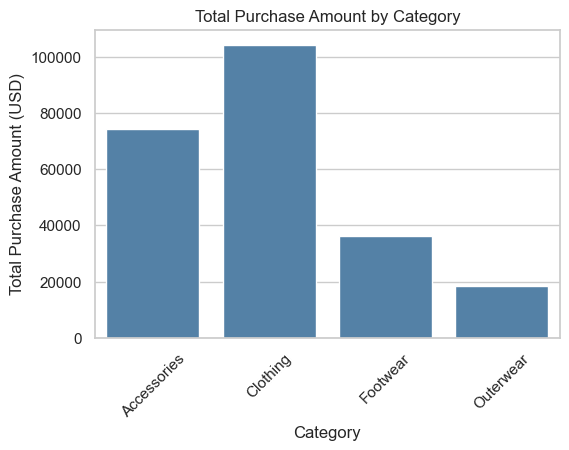

In [137]:
# What cateogry generates the most revenue?
category_analysis = pd.DataFrame(customers.groupby('Category')['Purchase_Amount'].sum())

sns.set_theme(style = "whitegrid")

plt.figure(figsize=(6, 4))
sns.barplot(data = category_analysis,
            x = 'Category',
            y = 'Purchase_Amount',
            color = 'steelblue')

plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)

* Clothing is not only the most popular category, but also generates the most revenue. Followed closer by accessories, then footwear and outerwear.

In [142]:
# Number of customers coming back to purchase again
previous_count = (customers['Previous_Purchases'] > 0).sum()
print(f"Number of customers coming back to purchase again: {previous_count}")

total_customers = len(customers)
print(f"Total customers: {total_customers}")

Number of customers coming back to purchase again: 3900
Total customers: 3900


* All customers in this dataset from this store have previously purchased something before (returning customers)

In [ ]:
# Percentage (%) of customers who are subscribed
subscribed = (customers['Subscription_Status'] == 'Yes').sum()
print(f"Percentage (%) of customers who are subscribed: {subscribed / total_customers * 100:.2f}%")

# By Gender
gender_subscribed = (customers['Subscription_Status'] == 'Yes').groupby(customers['Gender']).sum()
print('')
print(gender_subscribed)

Percentage (%) of customers who are subscribed: 27.00%

Gender
Female       0
Male      1053
Name: Subscription_Status, dtype: int64


In [150]:
# Percentage (%) of customers who purchase frequently (Weekly, Fortnightly, Bi-Weekly)
purchase_frequent = (
    (customers['Frequency_of_Purchases'] == 'Weekly') | 
    (customers['Frequency_of_Purchases'] == 'Fortnightly') | 
    (customers['Frequency_of_Purchases'] == 'Bi-Weekly') ).sum()

print(f"Percentage (%) of customers who purchase frequently: {purchase_frequent / total_customers * 100:.2f}%")

# Percentage (%) of customers who purchase frequently and are also subscribed
subscribed_frequent = (
    ((customers['Frequency_of_Purchases'] == 'Weekly') & (customers['Subscription_Status'] == 'Yes')) |
    ((customers['Frequency_of_Purchases'] == 'Fortnightly') & (customers['Subscription_Status'] == 'Yes')) |
    ((customers['Frequency_of_Purchases'] == 'Bi-Weekly') & (customers['Subscription_Status'] == 'Yes'))
)

print(f"Percentage (%) of customers who purchase frequently and are subscribed: {subscribed_frequent.sum() / total_customers * 100:.2f}%")

Percentage (%) of customers who purchase frequently: 41.74%
Percentage (%) of customers who purchase frequently and are subscribed: 11.54%


* All 3900 customers have previously purchased at this store before, but only 1053 of them (27%) are on our subscribed, whom are all men.

* 41.74% of customers purchase either weekly, fortnightly, or bi-weekly -- but only 11.54% are also using the subscribed indicating that many of those who already purchase frequently could gain an advantage from becoming subscribed.

/var/folders/th/n3xw8c_x70z41q9k952z3ct80000gn/T/ipykernel_1458/1394411217.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_sub_counts = freq_sub_age.groupby('Age_Group').size()


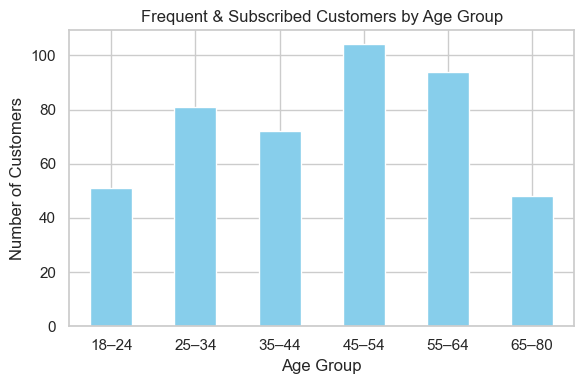

In [ ]:
# Customers purchase frequently and are subscribed by Age Groups
freq_sub_age = customers[subscribed_frequent]
freq_sub_counts = freq_sub_age.groupby('Age_Group').size()

# print(f"Customers who purchase frequently and are subscribed by Age Groups:\n")
# print(freq_sub_counts)

plt.figure(figsize=(6, 4))

freq_sub_counts.plot(kind = 'bar', 
                     color = 'skyblue')

plt.title('Frequent & Subscribed Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()

* Given we know that only men are subscribed, and we can further see that those who purchase frequently and are subscribed are men between the ages of 45 - 54. 

In [173]:
# Percentage(%) of customers who used a promo code or applied discount in their purchase
promo_discount = (customers['Promo_Code_Used'] == 'Yes') | (customers['Discount_Applied'] == 'Yes')

print(f"Percentage of customers who used a promo code or discount: {promo_discount.sum() / total_customers * 100:.2f}%")

# By Gender
print('')
gender_promo_discount = promo_discount.groupby(customers['Gender']).sum()
print(gender_promo_discount)

Percentage of customers who used a promo code or discount: 43.00%

Gender
Female       0
Male      1677
dtype: int64


* 43% of customers used a promo code or discount, and they were all men.

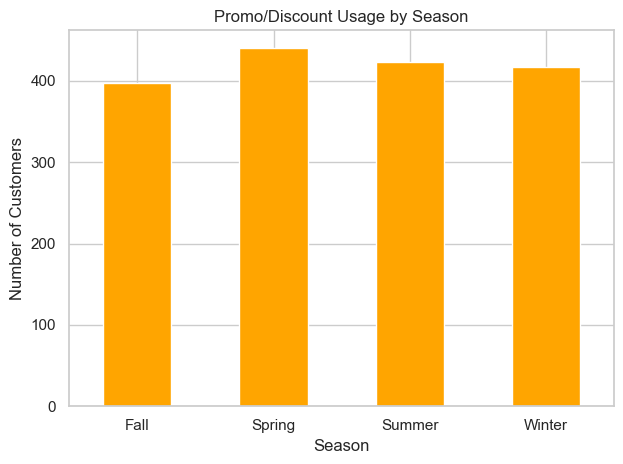

In [182]:
# Seasons that customers use promo codes or discounts the most
promo_season = (promo_discount).groupby(customers['Season']).sum()

promo_season.plot(kind='bar', 
                  color='orange')

plt.title('Promo/Discount Usage by Season')
plt.xlabel('Season')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()


In [ ]:
# What season generates the most revenue? 
season_revenue = pd.DataFrame(customers.groupby(['Season'])[['Purchase_Amount']].sum())
season_revenue.sort_values(by='Purchase_Amount', ascending=False)

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Winter,58607
Summer,55777


* Customers used promos and/or discounts the most in Spring, but use remains relatively consistent across the different seasons.

* Fall season generated the most revenue

In [ ]:
# What locations are driving most sales?
geographical_analysis = pd.DataFrame(customers.groupby(['Location'])[['Purchase_Amount']].sum())
geographical_analysis.sort_values(by='Purchase_Amount', ascending=False).head(5)

,Purchase Amount (USD)
Location,
Montana,5784
Illinois,5617
California,5605
Idaho,5587
Nevada,5514


---
## K-Means Clustering

K-Means Clustering was performed to discover potential groups based on specific variables associated with purchase behavior.

**Preparing for K-Means** -- changing categorical variables to be numeric, selecting variables of interest

In [6]:
# Categorical variables to binary 0/1
binary_map = {'Yes': 1, 'No': 0}
customers['Discount_Applied'] = customers['Discount_Applied'].map(binary_map)
customers['Promo_Code_Used'] = customers['Promo_Code_Used'].map(binary_map)
customers['Subscription_Status'] = customers['Subscription_Status'].map(binary_map)

# Frequency to numeric -- monthly values
freq_map = {
    'Weekly': 4,
    'Fortnightly': 2,
    'Monthly': 1,
    'Quarterly': 1/3,
    'Annually': 1/12
}
customers['Frequency_Num'] = customers['Frequency_of_Purchases'].map(freq_map)

In [8]:
# Selecting variables for clusters
selected = ['Purchase_Amount', 'Previous_Purchases', 'Review_Rating', 
            'Subscription_Status', 'Discount_Applied', 'Promo_Code_Used', 'Frequency_Num']
data = customers[selected]
data.head(5)

,Purchase_Amount,Previous_Purchases,Review_Rating,Subscription_Status,Discount_Applied,Promo_Code_Used,Frequency_Num
0,53,14,3.1,1,1,1,2.000000
1,64,2,3.1,1,1,1,2.000000
2,73,23,3.1,1,1,1,4.000000
3,90,49,3.5,1,1,1,4.000000
4,49,31,2.7,1,1,1,0.083333


In [ ]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customers[selected])

Text(0.5, 1.0, 'Elbow Method For Optimal k')

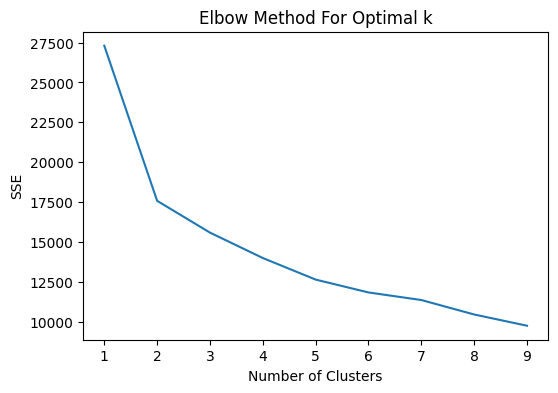

In [15]:
# Determining optimal number of clusters (k) with Elbow Method
inertia = []
num_clusters = range(1, 10)

for k in num_clusters: 
    k_means = KMeans(n_clusters = k, random_state = 42)
    k_means.fit(X_scaled)
    inertia.append(k_means.inertia_)

# Elbow plot
plt.figure(figsize=(6, 4))
plt.plot(num_clusters, inertia)

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')

**With the optimal number of clusters (k) being 2, fitting K-means**

In [25]:
# Fitting K-means with k = 2
kmeans = KMeans(n_clusters = 2, random_state = 42)
customers['Cluster'] = kmeans.fit_predict(X_scaled)

labels = kmeans.labels_

In [45]:
# Cluster centers (centroids)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = data.columns)
centroids_df

,Purchase_Amount,Previous_Purchases,Review_Rating,Subscription_Status,Discount_Applied,Promo_Code_Used,Frequency_Num
0,-0.020492,0.027099,-0.014375,0.806170,1.151339,1.151339,0.005048
1,0.015459,-0.020443,0.010844,-0.608164,-0.868554,-0.868554,-0.003808


Text(0, 0.5, 'Variables')

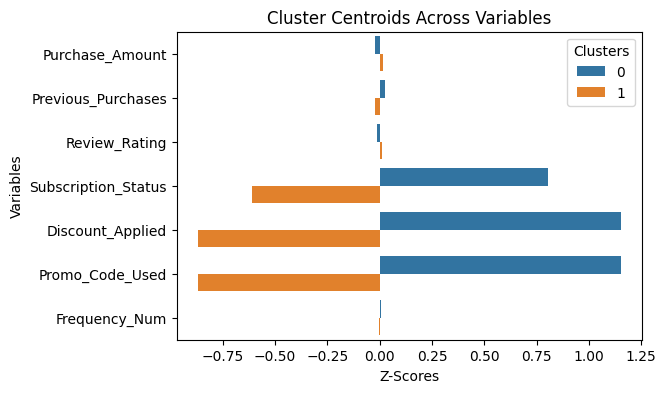

In [86]:
# Visualizing centroids to see relationship of selected variables with across clusters
centroids_df['Clusters'] = centroids_df.index
centroids_melt = centroids_df.melt(id_vars = 'Clusters')

plt.figure(figsize=(6, 4))
sns.barplot(y = 'variable', 
            x = 'value', 
            hue = 'Clusters', 
            data = centroids_melt)

plt.title("Cluster Centroids Across Variables")
plt.xlabel("Z-Scores")
plt.ylabel("Variables")

The 3 variables that are likely the main drivers of this segmentation is Subscription Status, Discount Applied, and Promo Code Used. 

Customers in cluster 0 are more likely to be subscribed as well as use discounts and/or promos, whereas customers in cluster 1 are more likely to not be subscribed, use discounts, or promos.

**Analyzing Clusters**

In [87]:
#Analyzing Clusters
    #selected is the selected variables for clusters as a list
cluster_summary = customers.groupby('Cluster')[selected].mean()
cluster_summary


,Purchase_Amount,Previous_Purchases,Review_Rating,Subscription_Status,Discount_Applied,Promo_Code_Used,Frequency_Num
Cluster,,,,,,,
0,59.279070,25.742993,3.739654,0.627907,1.0,1.0,1.369807
1,60.130454,25.056230,3.757715,0.000000,0.0,0.0,1.358450


**Demographics across cluster groups**

In [98]:
# Age
customers.groupby('Cluster')['Age'].mean()


Cluster
0    44.144902
1    44.010796
Name: Age, dtype: float64

In [108]:
# Gender
customers.groupby('Cluster')['Gender'].value_counts(normalize=True)

Cluster  Gender
0        Male      1.000000
1        Female    0.561404
         Male      0.438596
Name: proportion, dtype: float64

---
## Strategic Recommendations

* What are the customer segments based on purchase behavior?

* What customers are currently driving the most revenue?

* Which customers purchase the most frequently?

* Which customers uses promotions or discounts the most?

* Are there customers we could likely convert to subsciption?

* What products and categories are most popular? 

* When is the best season to promote the business?

* Overall, men seem to be the highest spenders, bringing the most revenue to the store. 

* Among them, the age range from 25 - 34 seem to spend the most, closely followed by age ranges 45 - 54, 35 - 44, and 55 - 64. 

---
* The average age of customers purchasing from this shop is 44 years old. Most of the customers are also male. 

* The most popular category purchased is clothing. The most popular item purchased is a blouse.

* The most purchases happen in Spring.

* Most customers are not subscribed and don't use discounts and/or promos.

--- 
* All 3900 customers have previously purchased at this store before, but only 1053 of them (27%) are on our subscribed, whom are all men.

* 41.74% of customers purchase either weekly, fortnightly, or bi-weekly -- but only 11.54% are also using the subscribed indicating that many of those who already purchase frequently could gain an advantage from becoming subscribed.

---
* Given we know that only men are subscribed, and we can further see that those who purchase frequently and are subscribed are men between the ages of 45 - 54. 
---
* 43% of customers used a promo code or discount, and they were all men.

---
* Customers used promos and/or discounts the most in Spring, but use remains relatively consistent across the different seasons.

* Fall season generated the most revenue